In [1]:
# %matplotlib inline
import mpld3
mpld3.enable_notebook()

import numpy as np
from pylab import *
from numpy.matlib import repmat
import matplotlib 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal 
from scipy.linalg import svd

from matplotlib import animation, rc
from IPython.display import HTML

from matplotlib.animation import FuncAnimation
# plt.style.use('ggplot')
import time

dt: 0.020000000000000004
dx: 0.1


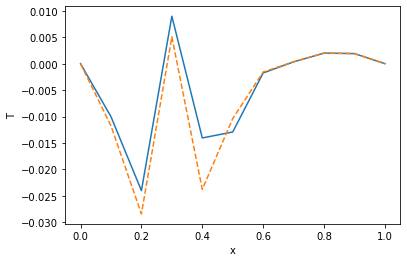

Simulation execution time: 0.001994609832763672


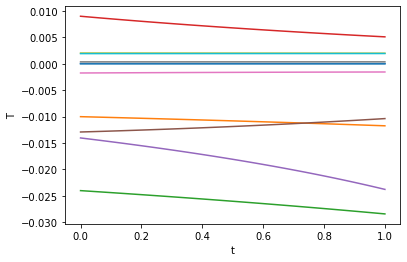

In [9]:
# FINITE DIFFERENCE SIMULATION - SOLVE GOVERNING EQUATIONS
L = 1 # Domain Length
Nx = 10 # Grid points
xmin = 0
xmax = L
x2 = np.linspace(xmin, xmax, Nx+1)
x=x2
tinit = 0
tfinal = 1 # total simulation duration


# calculate dt
dx = x[2]-x[1]
CFL = 0.2 
CFLu = CFL
q = np.zeros(Nx+1)
alpha =  0.00001 # Diffusivity

# Choose the discretization scheme for spatial derivative
#1 - backward - first order, 2 - same as 3 advection equation, 3 - backward - second order, 4 - same as 5 with advection
EqConv = 3 # only 1 or 3

dt1 = CFL*dx*dx/alpha
dt2 = CFLu*dx
dt = np.minimum(dt1,dt2)

print('dt:',dt)
print('dx:',dx)

time_arr = np.arange(tinit,tfinal,dt)
tstep = len(time_arr)
timearr = np.linspace(tinit,tfinal,tstep)

T = np.zeros((tstep,Nx+1))
Tnew = np.zeros((tstep,Nx+1))
Tin=np.zeros(Nx+1)
C1 = np.zeros((tstep,Nx+1))

# Initial condition 
for i in range(1,Nx):
    #Tin[i] = 0.01*np.sin(x[i])
    Tin[i] = 0.01*np.random.randn()

for i in range(Nx+1):
    T[0,i] = Tin[i]

qin = 0
for i in range(Nx+1):
    q[i] = qin*np.random.randn() #sin(x[i])
#---------------------------    
C_Conv = 1 # Include non-linear convection term in the governing equation (1 - On | 0 - Off)
C_Diff = 1 # Include linear diffusion term in the governing equation (1 - On | 0 - Off)
C_Src = 1 # Include source term in the governing equation (1 - On | 0 - Off)

start_time = time.time()

if(EqConv==1):
    for k in range(tstep):
        for i in range(1,Nx):
            Tnew[k,i]=T[k,i] - C_Conv*(dt/dx)*(T[k,i]-T[k,i-1])*T[k,i] + C_Diff*(alpha*dt/(dx*dx))*(T[k,i+1]-2*T[k,i]+T[k,i-1]) + C_Src*q[i]*dt
        # boundary conditions
        Tnew[k,0]=T[k,0] - C_Conv*(dt/dx)*(T[k,0]-T[k,-1])*T[k,0] + C_Diff*(alpha*dt/(dx*dx))*(T[k,1]-2*T[k,0]+T[k,-1]) + C_Src*q[0]*dt
        Tnew[k,-1]=T[k,-1] - C_Conv*(dt/dx)*(T[k,-1]-T[k,-2])*T[k,-1] + C_Diff*(alpha*dt/(dx*dx))*(T[k,0]-2*T[k,-1]+T[k,-2]) + C_Src*q[-1]*dt
        # update
        if(k < tstep-1):
            T[k+1,:] = Tnew[k,:]
        else:
            T[-1,:] = Tnew[-2,:]  

if(EqConv==3):  
    for k in range(tstep):
        for i in range(2,Nx):
            Tnew[k,i]=T[k,i] - C_Conv*(dt/(2*dx))*(3*T[k,i]-4*T[k,i-1]+T[k,i-2])*T[k,i] + C_Diff*(alpha*dt/(dx*dx))*(T[k,i+1]-2*T[k,i]+T[k,i-1]) + C_Src*q[i]*dt
        # boundary conditions
        Tnew[k,0]=T[k,0] - C_Conv*(dt/(2*dx))*(3*T[k,0]-4*T[k,-1]+T[k,-2])*T[k,0] + C_Diff*(alpha*dt/(dx*dx))*(T[k,1]-2*T[k,0]+T[k,-1]) + C_Src*q[0]*dt
        Tnew[k,1]=T[k,1] - C_Conv*(dt/(2*dx))*(3*T[k,1]-4*T[k,0]+T[k,-1])*T[k,1] + C_Diff*(alpha*dt/(dx*dx))*(T[k,2]-2*T[k,1]+T[k,0]) + C_Src*q[1]*dt
        Tnew[k,-1]=T[k,-1] - C_Conv*(dt/(2*dx))*(3*T[k,-1]-4*T[k,-2]+T[k,-3])*T[k,-1] + C_Diff*(alpha*dt/(dx*dx))*(T[k,0]-2*T[k,-1]+T[k,-2]) + C_Src*q[-1]*dt
        # update
        if(k < tstep-1):
            T[k+1,:] = Tnew[k,:]
        else:
            T[-1,:] = Tnew[-2,:]
           
end_time = time.time()
sim_time = end_time - start_time # time taken by the machine to run the simulation

plt.figure(1)
plt.plot(x,Tnew.T[:,0],x,Tnew.T[:,-1],'--');
plt.xlabel('x')
plt.ylabel('T')
plt.pause(0.1)


plt.figure(2)
plt.plot(timearr,Tnew);
plt.xlabel('t')
plt.ylabel('T')

print('Simulation execution time:',sim_time)

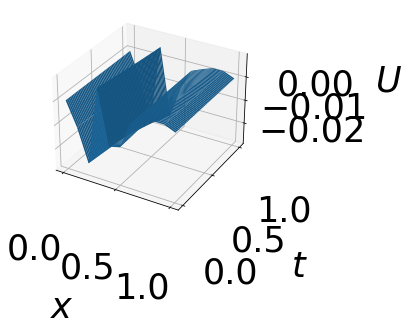

In [11]:
# Create 3D plot of the simulation data
%matplotlib inline
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")

X1,Y1 = np.meshgrid(x,timearr)
x_line = X1
y_line = Y1
z_line = Tnew

plt.rcParams['xtick.major.pad']='35'
plt.rcParams['ytick.major.pad']='35'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()): label.set_fontsize(35)

ax.plot_surface(x_line, y_line, z_line)
#ax.plot_wireframe(x_line, y_line, z_line)
#ax.scatter(x_line, y_line, z_line, marker='+')

ax.set_xlabel(r'$x$',fontsize=35,weight='bold',labelpad=60)
ax.set_ylabel(r'$t$',fontsize=35,weight='bold',labelpad=60)
ax.set_zlabel(r'$U$',fontsize=35,weight='bold',labelpad=70)
plt.locator_params(nbins=4)
plt.savefig('Plots/P2/HG1.jpg')
plt.show()

data matrix shape: (11, 50)
UL shape: (11, 11)
S shape: (11,)
VR shape: (50, 50)


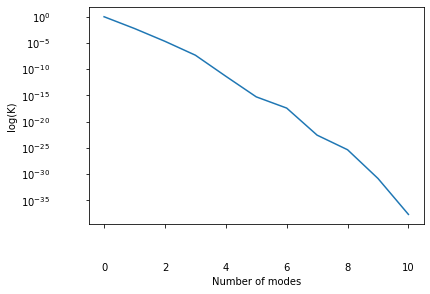

Text(0.5, 1.0, 'Temperature from SVD')

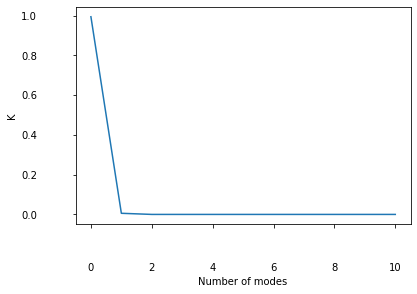

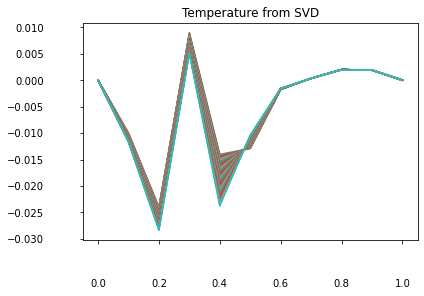

In [12]:
# Calculate SVD of Solution Matrix

data_T = Tnew.T
print('data matrix shape:',data_T.shape)

UL, S, VR = linalg.svd(data_T,full_matrices=True)

# Left singular vectors are columns of UL, Right singular vectors are rows of VR, singular values are S with min(m,n)

print('UL shape:',UL.shape)
print('S shape:',S.shape)
print('VR shape:',VR.shape)

# Compute signifance of the modes
K = np.square(S) / np.sum(np.square(S))

# Plot the number of significant modes
plt.figure(1)
plt.semilogy(K)
xlabel('Number of modes')
ylabel('log(K)')
plt.savefig('Plots/HeatK_semilogy.jpg')
plt.show()


plt.figure(2)
plt.plot(K)
plt.xlabel('Number of modes')
plt.ylabel('K')
#----------------

# Test if data can be reconstructed with all modes
r1=UL.shape[0]
Treduced = S[0:r1]*UL[:,0:r1]@VR[0:r1,:]

plt.figure(3)
plt.plot(x,Treduced)
plt.title('Temperature from SVD')

ROM execution time: 0.0010373592376708984
ROM time / Sim time = 0.5200812813770022


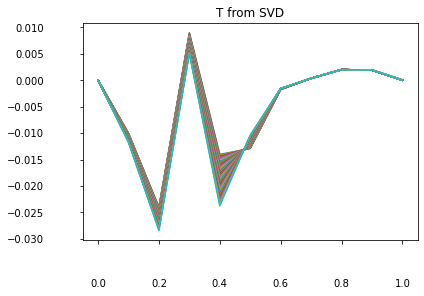

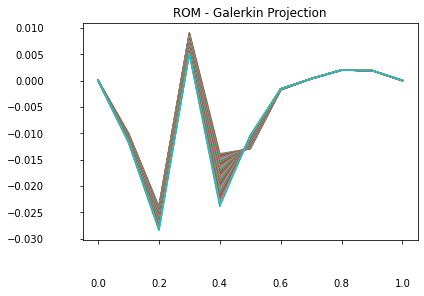

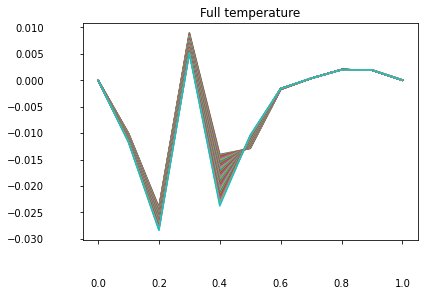

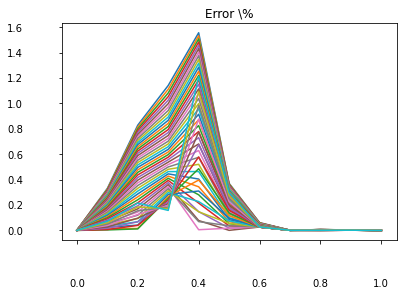

In [19]:
# Galerkin Projection of Governing equation on the Reduced Basis
tfinal1 = tfinal # Duration of the ROM set to be same as that of the finite difference simulation - This can be changed to any other value
Tin1 = np.zeros(Nx+1)
Tin1 = Tin # Initial condition used for the ROM is same as the initial condition used in the finite difference simulation

Rmax = UL.shape[0] # Number of spatial modes of the solution matrix
r = 5 # Number of modes selected for ROM. Choose a value of r > 1. This determines the number of modes with which the ROM is created.
rrange = np.arange(r)

# Create new matrices with reduced number of modes
sig = S[0:r] # sigma - singular values (significance of singular vectors)
phi = UL[:,0:r] # phi - spatial modes
phiT = phi.T # transpose of phi
Vt = VR[0:r,:] # psi - temporal coefficients

# Test if data can be reconstructed with a reduced number of modes
Tred = sig*phi@Vt
plt.figure(1)
plt.plot(x,Tred);
plt.title('T from SVD')
#----------------------------------
st = time.time()
######### COMPUTE SPATIAL DERIVATIVES ####################
# Second derivatives - Second order central finite difference scheme
def deriv2(psi,x1):
    n,d = psi.shape
    dx1 = x1[1] - x1[0]
    derv = np.zeros((n,d))
    for i in range(1,n-1):
        derv[i,:] = (psi[i+1,:] - 2*psi[i,:] + psi[i-1,:])/(dx1*dx1)
    # Periodic boundary condition    
    derv[0,:] = (psi[1,:] - 2*psi[0,:] + psi[-1,:])/(dx1*dx1)
    derv[-1,:] = (psi[0,:] - 2*psi[-1,:] + psi[-2,:])/(dx1*dx1)
    return derv

# First derivatives - Second order upwind scheme
def deriv1(psi,x1):
    n,d = psi.shape
    dx1 = x1[1] - x1[0]
    derv = np.zeros((n,d))
    #for i in range(1,n):
    #    derv[i,:] = (psi[i,:]-psi[i-1,:])/dx1
    #derv[0,:] = (psi[0,:]-psi[-1,:])/dx1
    for i in range(2,n):
        derv[i,:]=(3*psi[i,:]-4*psi[i-1,:]+psi[i-2,:])/(2*dx1)
    # Periodic boundary condition        
    derv[0,:]=(3*psi[0,:]-4*psi[-1,:]+psi[-2,:])/(2*dx1)
    derv[1,:]=(3*psi[1,:]-4*psi[0,:]+psi[-1,:])/(2*dx1)
    return derv

rstep,tstep = Vt.shape
# Create new array for a(t)
anew = np.zeros((tstep,rstep))
a0 = np.zeros((rstep))

# Project initial condition on the reduced basis
for i in range(rstep):
    a0[i] = phi[:,i]@Tin1
    
# Compute and store spatial derivatives of phi 
phixo = deriv1(phi,x) # d/dx (phi)
phixx = deriv2(phi,x) # d^2 / dx^2 (phi)

# Assemble parameters 
params = [phiT,phi,phixo,phixx,q,alpha,C_Conv,C_Diff,C_Src]
##################################################################
t0 = 0 # change this parameter if the ROM needs to be evaluated between a specific time interval [t0 - tf]
tf = tfinal1 # change this parameter if the ROM needs to be evaluated between a specific time interval [t0 - tf]
tnew_arr = np.arange(t0,tf,dt)
tstep1 = len(tnew_arr)
tnew = np.linspace(t0,tf,tstep1) # new time array [t0 - tf]

def RHS(a1,t,params1):
    phiT,phi,phixo,phixx,q,alpha,C_Conv,C_Diff,C_Src = params1
    T = phi@a1
    
    # test
    #dadt = phiT@np.sin(phi@a1) # du/dt = sin(u)
    #dadt = phiT@np.square(phi@a1) # du/dt = u^2 
    
    # option 3 - Convection Equation
    rhs_C = -C_Conv*phiT*T@phixo@a1 # convection -> du/dt = -u du/dx
    
    # option 4 - constant advection velocity
    #rhs_C = -C_Conv*phiT*U1@phixo@a1 # advection -> du/dt = -c du/dx
    
    # Diffusion term
    rhs_D = C_Diff*phiT*alpha@phixx
    # Source term
    rhs_S = C_Src*phiT@q
    # Compute RHS
    dadt_RHS = rhs_C + a1@rhs_D + rhs_S 

    return dadt_RHS

# Use a standard ODE solver to compute a(t) 
anew=odeint(RHS,a0,tnew,args=(params,))

# Create a new ROM by projecting a(t) on the reduced basis
Trom = phi@anew.T
et = time.time()
# Compute time taken by machine to run the ROM
rom_time = et - st

# Plot 
plt.figure(3)
plt.plot(x,Trom);
plt.title('ROM - Galerkin Projection')

plt.figure(4)
plt.plot(x,Tnew.T);
plt.title('Full temperature')

resN = 30000 # set high value  
#np.seterr(divide='ignore', invalid='ignore')
# Compute percentage error
Tres = np.abs(Tnew[0:resN,:].T - Trom[:,0:resN])*100/np.max(Trom[:,0:resN])


plt.figure(5)
plt.plot(x,Tres);
plt.title('Error \%')


print('ROM execution time:', rom_time)
# Ratio of ROM execution time and Simulation execution time
if(sim_time<=0):
    incr = 1e-10
    sim_time+=incr
    rom_time+=incr
    print('ROM time / Sim time =',rom_time / sim_time)
else:
    print('ROM time / Sim time =',rom_time / sim_time)

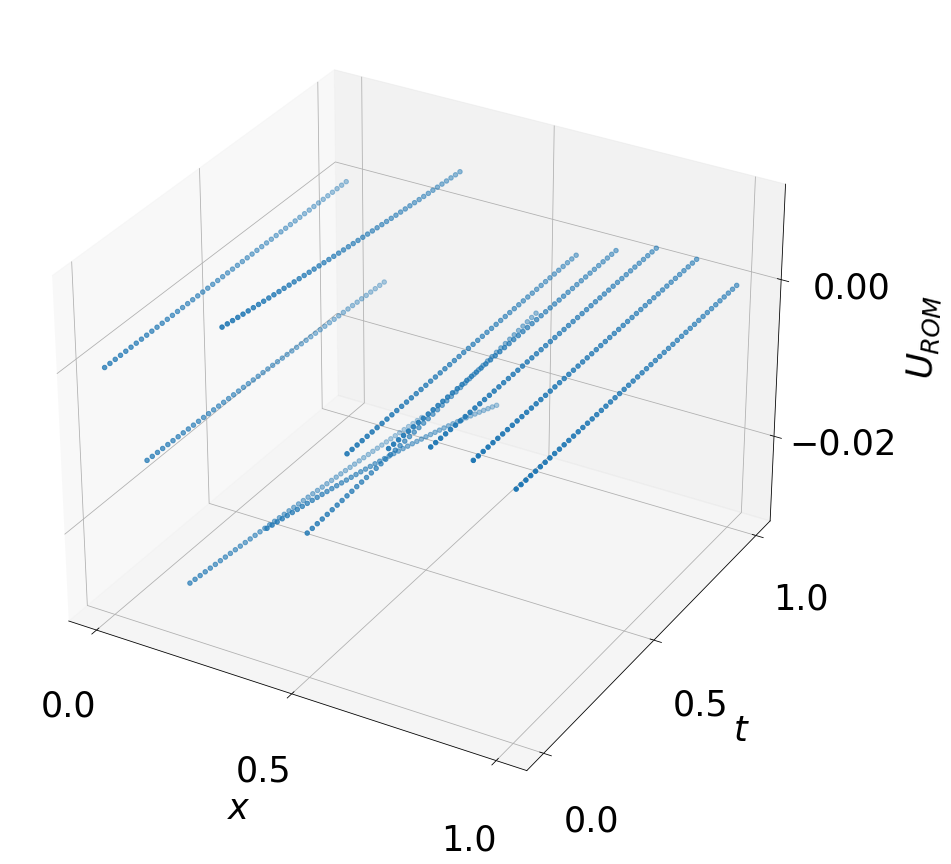

In [20]:
# Create 3D plot of ROM
%matplotlib inline
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")

X1,Y1 = np.meshgrid(x,tnew)
x_line = X1
y_line = Y1
z_line = Trom.T

plt.rcParams['xtick.major.pad']='35'
plt.rcParams['ytick.major.pad']='35'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()): label.set_fontsize(35)

#ax.plot_surface(x_line, y_line, z_line)
#ax.plot_wireframe(x_line, y_line, z_line)
ax.scatter(x_line, y_line, z_line, marker='o')

ax.set_xlabel(r'$x$',fontsize=35,weight='bold',labelpad=60)
ax.set_ylabel(r'$t$',fontsize=35,weight='bold',labelpad=60)
ax.set_zlabel(r'$U_{ROM}$',fontsize=35,weight='bold',labelpad=70)
plt.locator_params(nbins=4)
plt.savefig('Plots/HeatROM_r3.jpg')
plt.show()

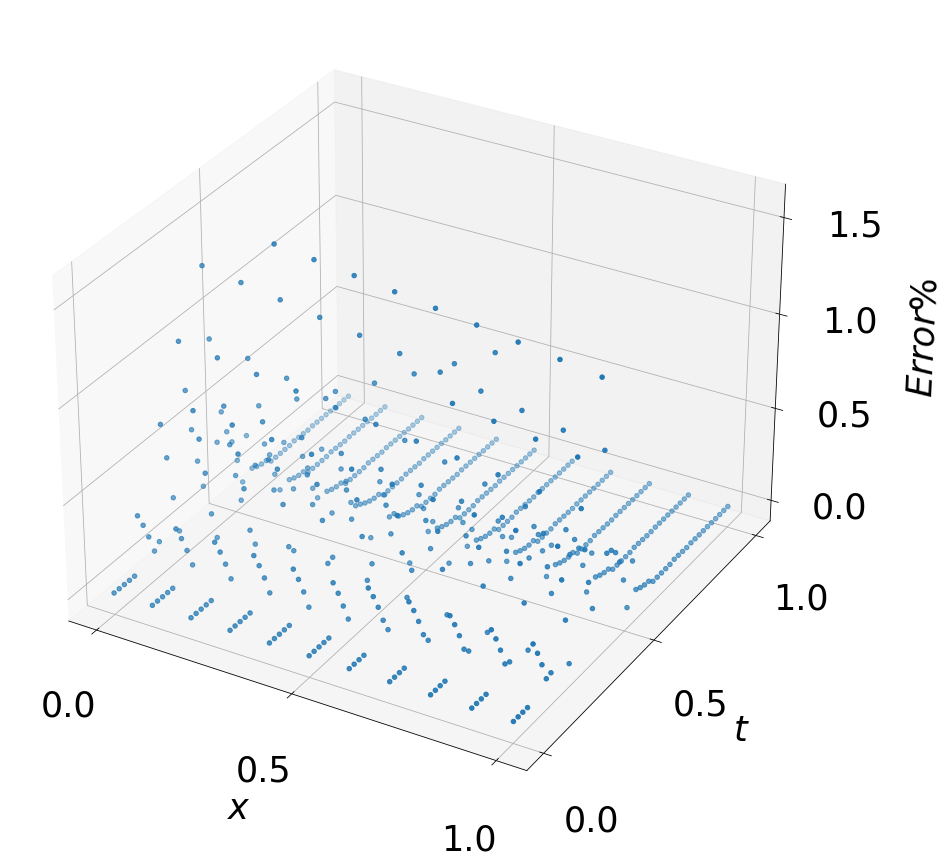

In [21]:
# Create 3D plot of % error
%matplotlib inline
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")

X1,Y1 = np.meshgrid(x,tnew)
x_line = X1
y_line = Y1
z_line = Tres

plt.rcParams['xtick.major.pad']='35'
plt.rcParams['ytick.major.pad']='35'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()): label.set_fontsize(35)

#ax.plot_surface(x_line, y_line, z_line)
#ax.plot_wireframe(x_line, y_line, z_line)
ax.scatter(x_line, y_line, z_line, marker='o')

ax.set_xlabel(r'$x$',fontsize=35,weight='bold',labelpad=60)
ax.set_ylabel(r'$t$',fontsize=35,weight='bold',labelpad=60)
ax.set_zlabel(r'$Error \%$',fontsize=35,weight='bold',labelpad=70)
plt.locator_params(nbins=4)
plt.savefig('Plots/HeatRes_r3.jpg')
plt.show()

cov1 shape: (50, 50)


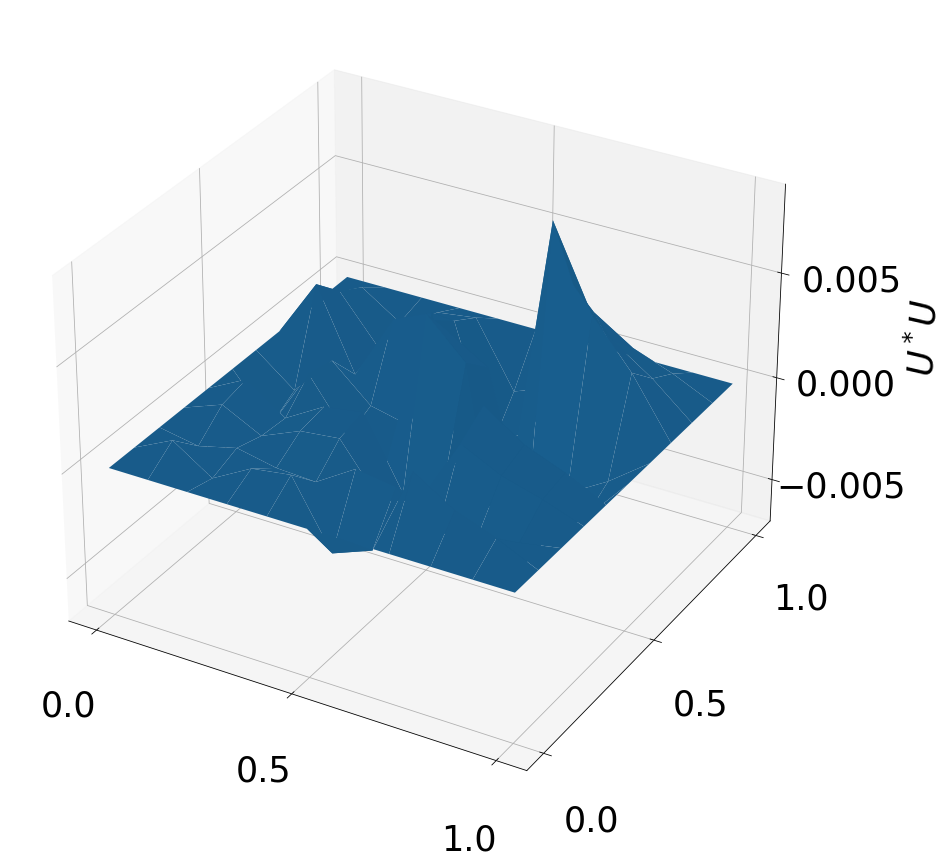

(50, 50)
(11, 11)


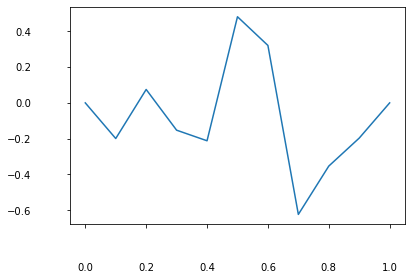

In [35]:
# Compute / plot covariance of solution matrix - Not required for development of ROM 
from numpy import linalg as LA
%matplotlib inline
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")

cov1 = Tnew@Tnew.transpose()
cov2 = Tnew.transpose()@Tnew
print('cov1 shape:',cov1.shape)

X1,Y1 = np.meshgrid(x,x)
x_line = X1
y_line = Y1
z_line = cov2

plt.rcParams['xtick.major.pad']='35'
plt.rcParams['ytick.major.pad']='35'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()): label.set_fontsize(35)

ax.plot_surface(x_line, y_line, z_line)
#ax.plot_wireframe(x_line, y_line, z_line)
#ax.scatter(x_line, y_line, z_line, marker='+')

ax.set_zlabel(r'$U^*U$',fontsize=35,weight='bold',labelpad=70)
plt.locator_params(nbins=4)
plt.savefig('Plots/P2/cov2.jpg')
plt.show()

# Eigen decomposition of Covariance matrix
W1,V1 = LA.eig(cov1)
W2,V2 = LA.eig(cov2)